# Intro to regression with neural network


In [3]:
import tensorflow as tf
print(tf.__version__)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

2.14.1


2023-12-09 14:14:54.476537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-09 14:14:54.476840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-09 14:14:54.477061: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

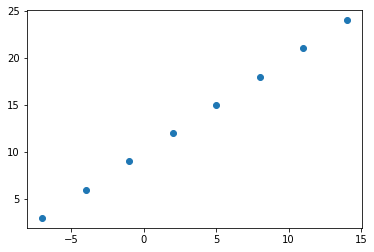

In [4]:
# Creating the data top view and fit
sess = tf.compat.v1.Session(config=config)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inputs and Output Shapes

In [4]:
#Demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2023-12-08 17:27:56.639735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

2023-12-08 17:27:56.639935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-08 17:27:56.640062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-08 17:27:56.640337: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[0].ndim

0

In [8]:
#Turn our Numpy arrays into Tensors

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

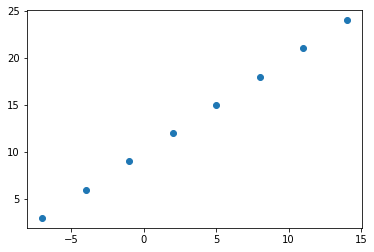

In [10]:
plt.scatter(x, y)

In [11]:
# Set seed
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

#mae - Mean Absolute Error
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=500)


Epoch 1/500


2023-12-08 17:27:58.745940: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 17:27:58.877096: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f54b11a21d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-08 17:27:58.877124: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5


1/1 [==============================] - 4s 4s/step - loss: 18.1045 - mae: 18.1045
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 17.8232 - mae: 17.8232
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 17.5420 - mae: 17.5420
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 17.2607 - mae: 17.2607
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 16.9795 - mae: 16.9795
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 16.6982 - mae: 16.6982
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 16.4170 - mae: 16.4170
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 16.1357 - mae: 16.1357
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 15.8545 - mae: 15.8545
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 15.5732 - mae: 15.5732
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 

2023-12-08 17:28:00.641403: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8906
2023-12-08 17:28:00.702793: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 22/500
1/1 [==============================] - 0s 4ms/step - loss: 13.5821 - mae: 13.5821
Epoch 23/500
1/1 [==============================] - 0s 4ms/step - loss: 13.4496 - mae: 13.4496
Epoch 24/500
1/1 [==============================] - 0s 4ms/step - loss: 13.3171 - mae: 13.3171
Epoch 25/500
1/1 [==============================] - 0s 4ms/step - loss: 13.1846 - mae: 13.1846
Epoch 26/500
1/1 [==============================] - 0s 4ms/step - loss: 13.0521 - mae: 13.0521
Epoch 27/500
1/1 [==============================] - 0s 3ms/step - loss: 12.9196 - mae: 12.9196
Epoch 28/500
1/1 [==============================] - 0s 4ms/step - loss: 12.7871 - mae: 12.7871
Epoch 29/500
1/1 [==============================] - 0s 3ms/step - loss: 12.6546 - mae: 12.6546
Epoch 30/500
1/1 [==============================] - 0s 3ms/step - loss: 12.5221 - mae: 12.5221
Epoch 31/500
1/1 [==============================] - 0s 4ms/step - loss: 12.3896 - mae: 12.3896
Epoch 32/500
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 6.2925 - mae: 6.2925
Epoch 197/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2869 - mae: 6.2869
Epoch 198/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2812 - mae: 6.2812
Epoch 199/500
1/1 [==============================] - 0s 4ms/step - loss: 6.2756 - mae: 6.2756
Epoch 200/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2700 - mae: 6.2700
Epoch 201/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2644 - mae: 6.2644
Epoch 202/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2587 - mae: 6.2587
Epoch 203/500
1/1 [==============================] - 0s 5ms/step - loss: 6.2531 - mae: 6.2531
Epoch 204/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2475 - mae: 6.2475
Epoch 205/500
1/1 [==============================] - 0s 3ms/step - loss: 6.2419 - mae: 6.2419
Epoch 206/500
1/1 [==============================] - 0s 4ms/step - loss: 6

1/1 [==============================] - 0s 3ms/step - loss: 5.3175 - mae: 5.3175
Epoch 371/500
1/1 [==============================] - 0s 5ms/step - loss: 5.3119 - mae: 5.3119
Epoch 372/500
1/1 [==============================] - 0s 3ms/step - loss: 5.3063 - mae: 5.3063
Epoch 373/500
1/1 [==============================] - 0s 4ms/step - loss: 5.3006 - mae: 5.3006
Epoch 374/500
1/1 [==============================] - 0s 3ms/step - loss: 5.2950 - mae: 5.2950
Epoch 375/500
1/1 [==============================] - 0s 3ms/step - loss: 5.2894 - mae: 5.2894
Epoch 376/500
1/1 [==============================] - 0s 3ms/step - loss: 5.2838 - mae: 5.2838
Epoch 377/500
1/1 [==============================] - 0s 3ms/step - loss: 5.2781 - mae: 5.2781
Epoch 378/500
1/1 [==============================] - 0s 5ms/step - loss: 5.2725 - mae: 5.2725
Epoch 379/500
1/1 [==============================] - 0s 3ms/step - loss: 5.2669 - mae: 5.2669
Epoch 380/500
1/1 [==============================] - 0s 4ms/step - loss: 5

In [12]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 52ms/step


array([[30.02419]], dtype=float32)

In [14]:
y_pred = model.predict([14.0])
y_pred

1/1 [==============================] - 0s 22ms/step


array([[25.411392]], dtype=float32)

# Improving our Model